In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualisation libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning Libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#IMPORTING THE DATASETS
fashion_train=pd.read_csv('fashion-mnist_train.csv')
fashion_test=pd.read_csv('fashion-mnist_test.csv')

In [3]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# HERE WE HAVE 60,000 IMAGES IN TRAIN AND 10000 IMAGES IN TEST SET. FOR WHICH IT CONTAINS THE PIXEL DETAILS AND THE LABEL DETAILS

# NOW WE HAVE TO  SPLIT THE FASHION TRAIN TO X TRAIN AND Y TRAIN AND SAME FOR FASHION TEST

In [5]:
X_train_fashion = fashion_train.drop('label', axis=1)
X_train_fashion 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train_fashion=fashion_train['label']
y_train_fashion

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [7]:
X_test_fashion = fashion_test.drop('label', axis=1)
X_test_fashion 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y_test_fashion=fashion_test['label']
y_test_fashion

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

# .reshape(-1, 1)	(N, 1)	N rows, 1 column (column vector) - converting 2d to 3d for visualisation

In [9]:
# RESHAPING DATASET
X_train_reshape=X_train_fashion.values.reshape(-1,28,28)
X_train_reshape

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [10]:
X_train_reshape.shape

(60000, 28, 28)

In [11]:
X_train_reshape[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
X_test_reshape=X_test_fashion.values.reshape(-1,28,28)
X_test_reshape

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   4, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [13]:
#Names of clothing accessories in order
col_names=['tops','trouser','pullover','dress','coat','sandal','skirt','sneaker','bag','boot']

# THE PURPOSE OF RESHAPING THE X_TRAIN IS TO VISUALIZE THE IMAGE IN GREY SCALE USING 28*28 PIXELS
# 60000,784 to 60000,28,28

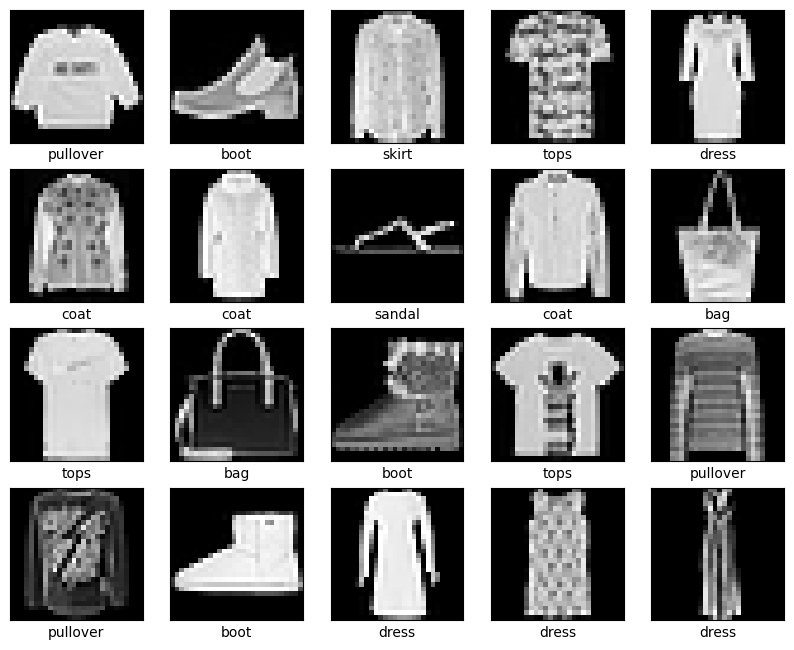

In [14]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # this removes the graphical numericals from xaxis
    plt.yticks([]) # this removes the graphical numericals from yaxis
    plt.imshow(X_train_reshape[i],cmap='grey')# plt.imshow() is used to visualize 2D/3D arrays as images.
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [15]:
# Now we have to check and reshape y_train and y_test if needed as ANN only accepts o/p in one hot encoding format

In [16]:
y_train_fashion.shape

(60000,)

In [17]:
y_train_fashion.value_counts().index
# This display that the output is classified in 10 classes

Index([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype='int64', name='label')

# NOW WE HAVE RESHAPED THE O/P IN DESIRED FORMAT FROM (60000,) TO (60000,10)

In [18]:
y_train_fashion= to_categorical(y_train_fashion,num_classes=10)
y_train_fashion

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [19]:
y_train_fashion.shape

(60000, 10)

In [20]:
y_test_fashion= to_categorical(y_test_fashion,num_classes=10)
y_test_fashion

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [21]:
#CREATING BASE NEURAL NETWORK
model= keras.Sequential([layers.Dense(128,activation='relu',input_shape=(784,)),# this shape here is a tuple which displays 1D data),
                         layers.Dropout(0.3),
                         layers.BatchNormalization(),
                         layers.Dense(24,activation='relu'),
                         layers.Dropout(0.3),
                         layers.BatchNormalization(),
                         #here no input shape cuz previous layer o/p is its input
                         layers.Dense(24,activation='relu'),
                         layers.Dropout(0.3),
                         layers.BatchNormalization(),
                         layers.Dense(10,activation='softmax')])

C:\anaconda3\envs\AI\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [23]:
# Compilimg the model
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics= ['accuracy'])

In [24]:
history= model.fit(X_train_fashion,y_train_fashion, batch_size=100, epochs=10, validation_data=(X_test_fashion,y_test_fashion))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5169 - loss: 1.4143 - val_accuracy: 0.8067 - val_loss: 0.5646
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7408 - loss: 0.7549 - val_accuracy: 0.8425 - val_loss: 0.4618
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7678 - loss: 0.6814 - val_accuracy: 0.8447 - val_loss: 0.4903
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7865 - loss: 0.6402 - val_accuracy: 0.8562 - val_loss: 0.4314
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7953 - loss: 0.6166 - val_accuracy: 0.8499 - val_loss: 0.4189
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8050 - loss: 0.5889 - val_accuracy: 0.8491 - val_loss: 0.4147
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8050 - loss: 0.5807 - val_accuracy: 0.8647 - val_loss: 0.4130
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8103 - loss: 0.5705 - val_accuracy: 0.

In [25]:
y_predict=model.predict(X_test_fashion)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.9866953e-01, 2.9388035e-04, 6.8123699e-03, ..., 2.9487308e-06,
        1.8201764e-03, 9.2034315e-06],
       [3.8239968e-06, 9.9997723e-01, 1.7478581e-07, ..., 2.0772733e-08,
        7.8283115e-08, 3.1168859e-09],
       [1.9295409e-02, 1.1919445e-03, 6.8260044e-01, ..., 2.9151290e-04,
        3.7878002e-03, 1.6438005e-04],
       ...,
       [9.3750023e-06, 4.2084172e-09, 1.1901441e-06, ..., 2.6665205e-07,
        9.9998033e-01, 4.8966609e-08],
       [3.8937077e-02, 2.2600571e-04, 1.9445632e-02, ..., 1.3466118e-03,
        8.2924789e-01, 1.9966746e-03],
       [4.8935276e-02, 1.1434172e-01, 4.2309281e-01, ..., 6.2627890e-03,
        2.4372550e-02, 1.5249567e-03]], dtype=float32)

In [26]:
# I have to convert the out put of ANN to understandable format, so I have to find the max activation value's corresponding index

In [27]:
y_predicts=np.argmax(y_predict,axis=1)
y_predicts


array([0, 1, 2, ..., 8, 8, 2])

In [28]:
y_test_fashion

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)
y_test_fashion_eval

array([0, 1, 2, ..., 8, 8, 1])

In [30]:
# NOW WE have both the o/p test and predicted values in desirable for mat for comparison

In [31]:
#EVALUATION METRICS
#CONFUSION MATRIX FOR DIGIT MNIST
con_mat=confusion_matrix(y_test_fashion_eval,y_predicts)
con_mat

array([[858,   1,  12,  44,   3,   0,  62,   0,  20,   0],
       [  2, 973,   3,  17,   2,   0,   3,   0,   0,   0],
       [ 11,   0, 768,  13, 156,   0,  43,   0,   9,   0],
       [ 20,   8,  17, 907,  36,   0,  10,   0,   2,   0],
       [  0,   0,  60,  24, 891,   0,  24,   0,   1,   0],
       [  1,   0,   0,   2,   0, 895,   0,  52,   4,  46],
       [186,   3, 111,  37, 182,   0, 463,   0,  18,   0],
       [  0,   0,   0,   0,   0,  15,   0, 896,   0,  89],
       [  2,   0,   5,   2,   4,   1,   9,   2, 974,   1],
       [  0,   0,   0,   0,   0,   2,   0,  23,   0, 975]])

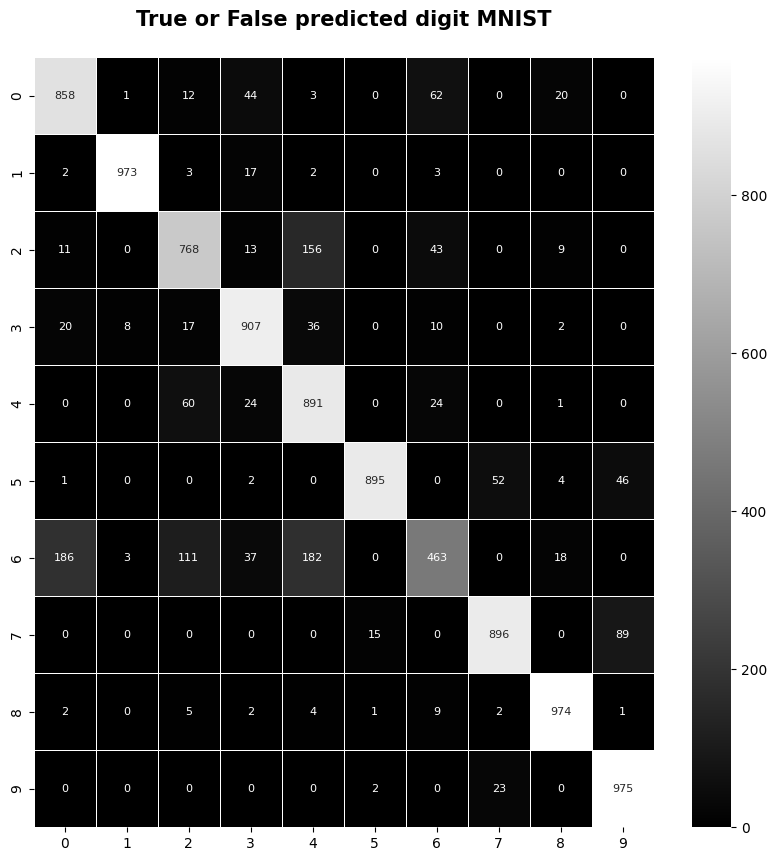

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':8},linewidth=0.5,cmap='grey',fmt='d')
plt.title('True or False predicted digit MNIST\n', fontweight='bold',fontsize=15) #\n leaves a line below and starts the next line of code
plt.show()
# Here the diagonal values display the right set of predictions

In [33]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.77      0.78      1000
           3       0.87      0.91      0.89      1000
           4       0.70      0.89      0.78      1000
           5       0.98      0.90      0.94      1000
           6       0.75      0.46      0.57      1000
           7       0.92      0.90      0.91      1000
           8       0.95      0.97      0.96      1000
           9       0.88      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
history.history['accuracy']

[0.6317333579063416,
 0.7494000196456909,
 0.7748500108718872,
 0.7915166616439819,
 0.7979666590690613,
 0.8036500215530396,
 0.8062999844551086,
 0.8119999766349792,
 0.8159999847412109,
 0.8170666694641113]

In [36]:
history.history['val_accuracy']

[0.8066999912261963,
 0.8424999713897705,
 0.8446999788284302,
 0.8561999797821045,
 0.8499000072479248,
 0.8490999937057495,
 0.8647000193595886,
 0.8578000068664551,
 0.8669999837875366,
 0.8600000143051147]

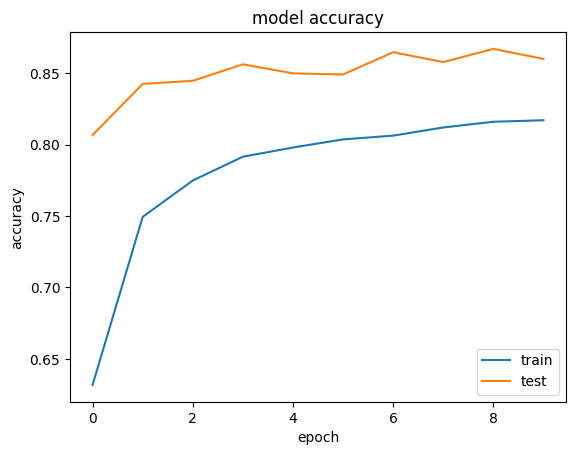

In [37]:
# ACCURACY PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

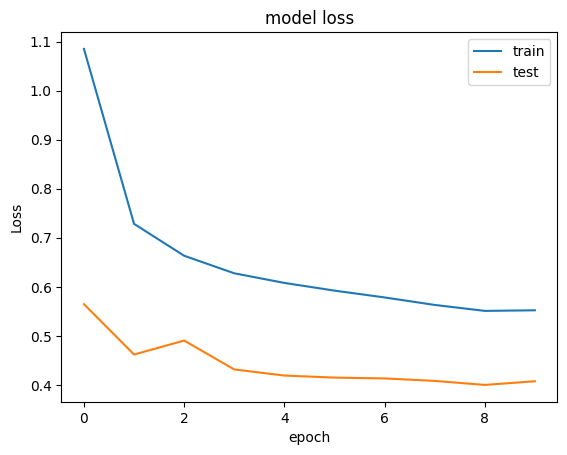

In [38]:
# LOSS PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [65]:
# Prediction for single input
#y_predict_single= model.predict(X_test_fashion[0])
#y_predict_single

KeyError: 0

In [66]:
X_test_fashion.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [67]:
X_test_fashion.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   9,   8,   0,   0,  34,  29,
         7,   0,  11,  24,   0,   0,   3,   3,   1,   0,   1,   1,   0,
         0,   0,   0,   0,   4,   0,   0,   1,   0,   0,   0,   0,   0,
        44,  88,  99, 122, 123,  80,   0,   0,   0,   0,   1,   1,   1,
         0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0,   3,  46,
       174, 249,  67,   0,  94, 210,  61,  14, 212, 157,  37,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   2,   2,   0,  23, 168,
       206, 242, 239, 238, 214, 125,  61, 113,  74, 133, 236, 238, 236,
       203, 184,  20,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,
       175, 245, 223, 207, 205, 206, 216, 255, 237, 251, 232, 223, 212,
       200, 205, 216, 249, 173,   0,   0,   2,   0,   0,   0,   0,   7,
         0,  53, 225, 201, 197, 200, 201, 206, 199, 197, 185, 194, 204,
       232, 226, 249, 219, 194, 205, 229,  33,   0,   1,   0,   0,   0,
         0,   1,   0, 133, 223, 208, 192, 195, 233, 226, 216, 19

In [42]:
X_test_fashion.iloc[0].values.reshape(1,-1)

array([[  0,   0,   0,   0,   0,   0,   0,   9,   8,   0,   0,  34,  29,
          7,   0,  11,  24,   0,   0,   3,   3,   1,   0,   1,   1,   0,
          0,   0,   0,   0,   4,   0,   0,   1,   0,   0,   0,   0,   0,
         44,  88,  99, 122, 123,  80,   0,   0,   0,   0,   1,   1,   1,
          0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0,   3,  46,
        174, 249,  67,   0,  94, 210,  61,  14, 212, 157,  37,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   2,   2,   0,  23, 168,
        206, 242, 239, 238, 214, 125,  61, 113,  74, 133, 236, 238, 236,
        203, 184,  20,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,
        175, 245, 223, 207, 205, 206, 216, 255, 237, 251, 232, 223, 212,
        200, 205, 216, 249, 173,   0,   0,   2,   0,   0,   0,   0,   7,
          0,  53, 225, 201, 197, 200, 201, 206, 199, 197, 185, 194, 204,
        232, 226, 249, 219, 194, 205, 229,  33,   0,   1,   0,   0,   0,
          0,   1,   0, 133, 223, 208, 192, 195, 233

In [44]:
X_test_fashion.iloc[0].values.reshape(1,-1).shape

(1, 784)

In [71]:
y_predict_single = model.predict(X_test_fashion.iloc[0].values.reshape(1, -1))
y_predict_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[9.2820507e-01, 4.4244164e-09, 2.4042431e-05, 1.1858604e-02,
        4.7037744e-07, 0.0000000e+00, 5.9911791e-02, 0.0000000e+00,
        1.4675351e-10, 0.0000000e+00]], dtype=float32)

Code	Shape Result	Meaning
.reshape(1, -1)	(1, N)	1 row, N columns (row vector)
.reshape(-1, 1)	(N, 1)	N rows, 1 column (column vector)
# HERE WE USE 1,-1 BECAUSE ANN EXPECTS 784 COLUMN FEATURES AS INPUT NOT 784 ROWS- so we need row vector

In [72]:
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_predicts_single

array([0])

In [73]:
y_predicts_single[0]

np.int64(0)

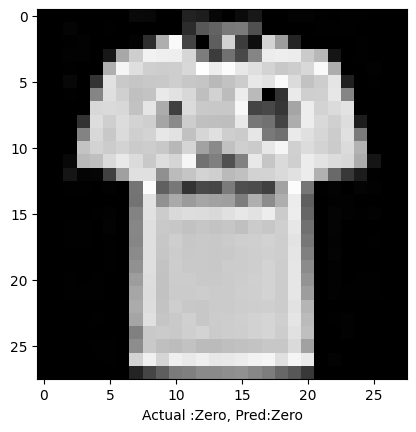

In [74]:
#Names of the numbers in dataset in order
col_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.imshow(X_test_reshape[0],cmap='grey')
plt.xlabel("Actual :{}, Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predicts_single[0]]))
plt.show()

In [39]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22]}

df = pd.DataFrame(data, index=[101, 102, 103])

In [40]:
df.iloc[0] 

Name    Alice
Age        25
Name: 101, dtype: object

In [45]:
df

,Name,Age
101,Alice,25
102,Bob,30
103,Charlie,22


In [46]:
df.iloc[0]

Name    Alice
Age        25
Name: 101, dtype: object